# Introduction

The aim of this project is to find the best location for a new oil well for the OilyGiant mining company. The project involves several critical steps, including collecting oil well parameters, building a predictive model, selecting the wells with the highest estimated values, and choosing the region with the highest total profit for the selected oil wells.

In this project, we will:

Collect data on oil quality and volume of reserves in the selected regions.
Build a model to predict the volume of reserves in new wells.
Identify the wells with the highest predicted values.
Select the region that promises the highest total profit for the chosen oil wells.
Using data on oil samples from three regions, the goal is to determine which region offers the best profit margin. This will be achieved by analyzing potential profits and risks with the Bootstrapping technique, ensuring a thorough evaluation of each region's potential.

## Download and prepare the data 

In [2]:
# Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.utils import resample

In [3]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [7]:
# checking the datasets datatypes, for duplicates and for null types 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df1.duplicated().sum()

0

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
df2.duplicated().sum()

0

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
df3.duplicated().sum()

0

We see that there is no duplicated rows or null values in the datasets that were given.

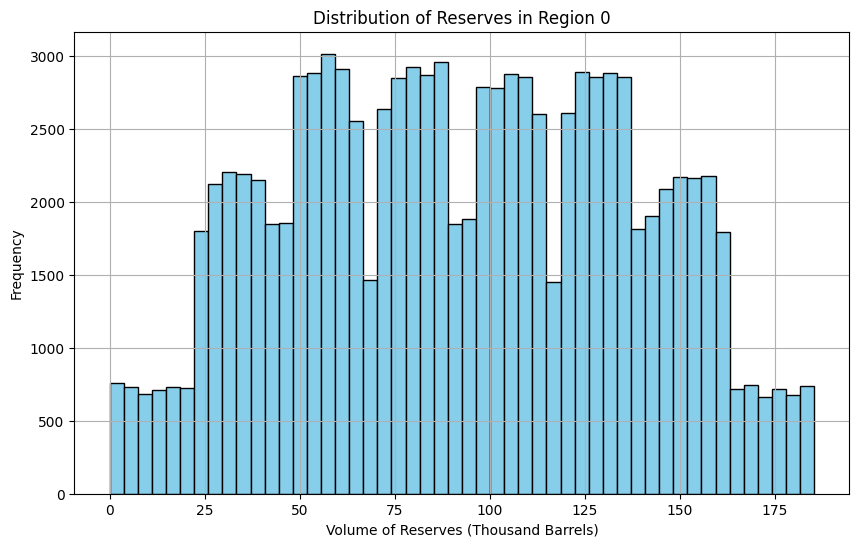

In [13]:
import matplotlib.pyplot as plt

# Plot histogram of reserves in region 0
plt.figure(figsize=(10, 6))
plt.hist(df1['product'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Reserves in Region 0')
plt.xlabel('Volume of Reserves (Thousand Barrels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Based on the graph above: it shows the distribution of reserves in Region 0. It appears to have a multimodal distribution, with several peaks indicating multiple clusters of reserves at different volume levels. The highest peak is between 2,500 and 3,000 thousand barrels, suggesting a significant number of reserves with volumes around that level.

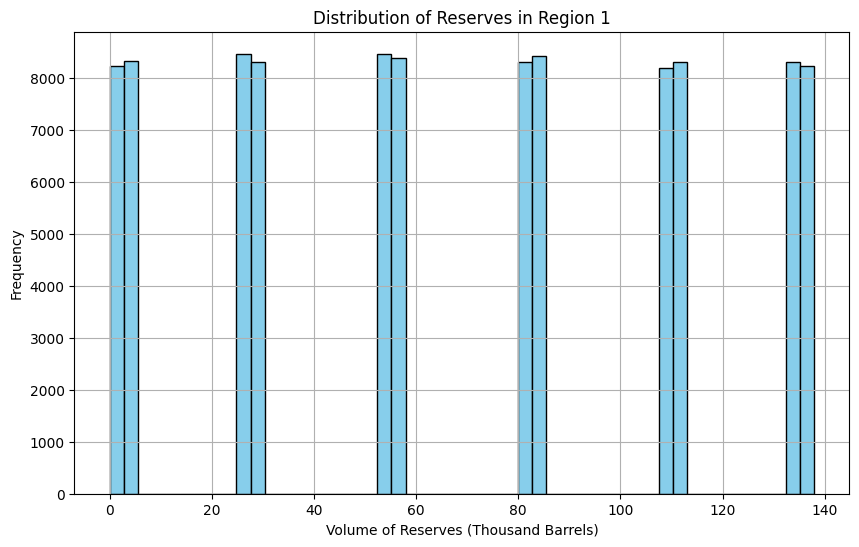

In [14]:
# Plot histogram of reserves in region 0
plt.figure(figsize=(10, 6))
plt.hist(df2['product'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Reserves in Region 1')
plt.xlabel('Volume of Reserves (Thousand Barrels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the graph above, we see the distribution of reserves in Region 1. It has a distinct bimodal distribution, with two prominent peaks around 8,000 and 8,500 thousand barrels. This indicates that most reserves in this region are concentrated around these two volume levels.

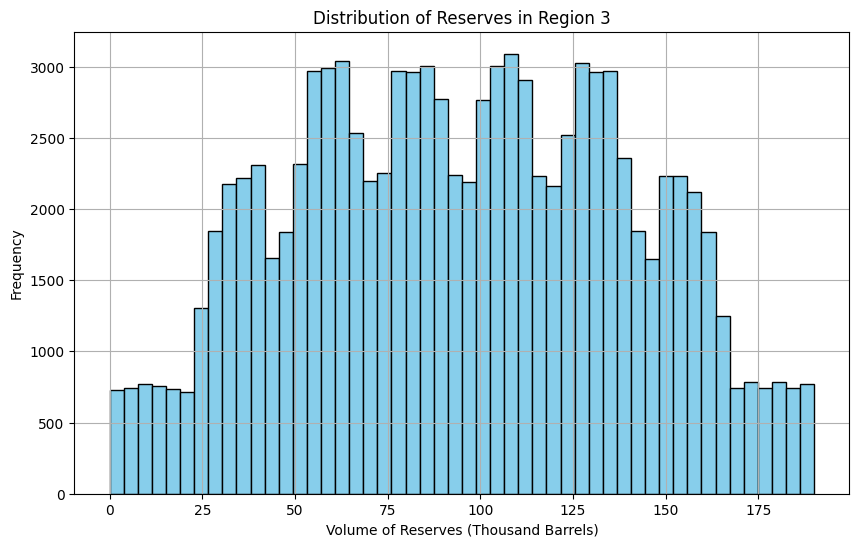

In [15]:
# Plot histogram of reserves in region 0
plt.figure(figsize=(10, 6))
plt.hist(df3['product'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Reserves in Region 3')
plt.xlabel('Volume of Reserves (Thousand Barrels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the graph above we see that the distribution of reserves in Region 3. It exhibits a more complex, multimodal distribution with several peaks and troughs. The highest peak is around 3,000 thousand barrels, indicating a large number of reserves with volumes around that level. However, there are also other significant peaks at various volume levels, suggesting a diverse range of reserve sizes in this region.

## Train and test the model for each region

In [16]:
def train_test_model(data):
    # Split data into features (X) and target (y)
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    
    # Split data into training and validation sets
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Make predictions on validation set
    target_pred = model.predict(features_valid)
    
    # Calculate RMSE
    rmse = mean_squared_error(target_valid, target_pred, squared=False)
    
    # Print average volume of predicted reserves and model RMSE
    print("Average Volume of Predicted Reserves:", target_pred.mean())
    print("Model RMSE:", rmse)
    
    return model, target_pred, target_valid

In [17]:
# Train and test model for each region
print("Region 0:")
model_0, predictions_0, true_values_0 = train_test_model(df1)

Region 0:
Average Volume of Predicted Reserves: 92.3987999065777
Model RMSE: 37.756600350261685


In [18]:
print("Region 1:")
model_1, predictions_1, true_values_1 = train_test_model(df2)

Region 1:
Average Volume of Predicted Reserves: 68.71287803913762
Model RMSE: 0.890280100102884


In [19]:
print("Region 2:")
model_2, predictions_2, true_values_2 = train_test_model(df3)

Region 2:
Average Volume of Predicted Reserves: 94.77102387765939
Model RMSE: 40.14587231134218


Interpretation of RMSE
- Lower RMSE: Indicates a better fit of the model to the data, meaning the predictions are closer to the actual values.
- Higher RMSE: Indicates a poorer fit, meaning there is a larger difference between the predicted and actual values.
 
From the results of the models above, we see that the region with the lowest RSME is region 1. Also we must note that it has the lowest reserves as well.

## Prepare for profit calculation

When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.

The budget for development of 200 oil wells is 100 USD million.

One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

### Store all key values for calculations in separate variables.

In [20]:
# Store Key Values
budget = 100000000  # in USD
revenue_per_barrel = 4.5  # in USD
total_wells = 200
cost_per_well = budget / total_wells  # 500,000 USD

In [21]:
# Calculate average volume of reserves in each region
avg_volume_region_0 = df1['product'].mean()
avg_volume_region_1 = df2['product'].mean()
avg_volume_region_2 = df3['product'].mean()

### Calculate the volume of reserves sufficient for developing a new well without losses.

In [22]:
break_even_volume = cost_per_well / revenue_per_barrel 
print(f"Break-even volume of reserves per well (barrels): {break_even_volume:.3f}")
# Since the volume of reserves is given in thousand barrels, convert this to thousand barrels:
break_even = break_even_volume / 1000
print(f"Break even in thousand barrels: {break_even}")

Break-even volume of reserves per well (barrels): 111111.111
Break even in thousand barrels: 111.11111111111111


In [23]:
# compare with average voliume of reserves in each region

print("Average volume of reserves in each region (thousand barrels):")
print(f"Region 0: {avg_volume_region_0:.3f}")
print(f"Region 1: {avg_volume_region_1:.3f}")
print(f"Region 2: {avg_volume_region_2:.3f}")

Average volume of reserves in each region (thousand barrels):
Region 0: 92.500
Region 1: 68.825
Region 2: 95.000


### Provide the findings about the preparation for profit calculation step.

Findings:
1. The Break-even volume is: 111.111 thousand barrels
2. The average volume of reserves are:
   - Region 0: 92.500 thousand barrels
   - Region 1: 68.825 thousand barrels
   - Region 2: 95.000 thousand barrels

Based on the above analysis, none of the regions have an average volume of reserves that meets or exceeds the break-even volume of 111.111 thousand barrels. This implies that, on average, wells in these regions may not be profitable if developed, as they fall short of the volume needed to break even on the cost of development.

## function to calculate profit from a set of selected oil wells and model predictions

### Pick the wells with the highest values of predictions.

In [24]:
def calculate_profit(predictions, true_values, budget=100000000, cost_per_well=500000, revenue_per_barrel=4.5, top_n_wells=200):
    # Select the top N wells with the highest predicted values
    top_wells_indices = predictions.argsort()[-top_n_wells:][::-1]
    selected_true_values = true_values[top_wells_indices]

    # Calculate the total volume of reserves for the selected wells
    total_volume = selected_true_values.sum()

    # Calculate the profit
    total_revenue = total_volume * revenue_per_barrel * 1000  # Convert thousand barrels to barrels
    total_cost = top_n_wells * cost_per_well
    profit = total_revenue - total_cost

    return profit, total_volume

In [25]:
# Convert pandas Series to numpy arrays
predictions_0 = np.array(predictions_0)
true_values_0 = np.array(true_values_0)
predictions_1 = np.array(predictions_1)
true_values_1 = np.array(true_values_1)
predictions_2 = np.array(predictions_2)
true_values_2 = np.array(true_values_2)

### Calculate profit for each region

In [26]:
# Calculate profit for each region
profit_0, total_volume_0 = calculate_profit(predictions_0, true_values_0)
profit_1, total_volume_1 = calculate_profit(predictions_1, true_values_1)
profit_2, total_volume_2 = calculate_profit(predictions_2, true_values_2)

# Print findings
print(f"Region 0: Total volume of reserves: {total_volume_0:.2f} thousand barrels, Profit: ${profit_0:.2f}")
print(f"Region 1: Total volume of reserves: {total_volume_1:.2f} thousand barrels, Profit: ${profit_1:.2f}")
print(f"Region 2: Total volume of reserves: {total_volume_2:.2f} thousand barrels, Profit: ${profit_2:.2f}")

Region 0: Total volume of reserves: 29686.98 thousand barrels, Profit: $33591411.14
Region 1: Total volume of reserves: 27589.08 thousand barrels, Profit: $24150866.97
Region 2: Total volume of reserves: 27996.83 thousand barrels, Profit: $25985717.59


In [27]:
# Determine the best region
profits = [profit_0, profit_1, profit_2]
best_region = np.argmax(profits)
print(f"Best region for oil wells development is Region {best_region} with a profit of ${profits[best_region]:.2f}")

Best region for oil wells development is Region 0 with a profit of $33591411.14


## Calculate risks and profit for each region:

In [28]:
def calculate_risks_and_profit(profit_samples):
    # Calculate average profit
    avg_profit = np.mean(profit_samples)

    # Calculate 95% confidence interval
    confidence_interval = np.percentile(profit_samples, [2.5, 97.5])

    # Calculate risk of losses
    risk_of_losses = np.mean(profit_samples < 0) * 100

    return avg_profit, confidence_interval, risk_of_losses

In [29]:
# Function to perform bootstrapping and calculate profit samples
def bootstrap_profit(predictions, true_values, budget=100000000, cost_per_well=500000, revenue_per_barrel=4.5, top_n_wells=200, num_samples=1000, sample_size=500):
    # Initialize list to store profit samples
    profit_samples = []

    # Set random state for reproducibility
    np.random.seed(42)

    # Perform bootstrapping
    for i in range(num_samples):
        # Sample with replacement from predictions and true values
        sampled_predictions, sampled_true_values = resample(predictions, true_values, n_samples=sample_size)

        # Calculate profit for sampled data
        profit, i = calculate_profit(sampled_predictions, sampled_true_values)
        
        # Append profit to samples list
        profit_samples.append(profit)

    return np.array(profit_samples)

In [30]:
# Calculate bootstrap profit for each region
profit_samples_region_0 = bootstrap_profit(predictions_0, true_values_0)
profit_samples_region_1 = bootstrap_profit(predictions_1, true_values_1)
profit_samples_region_2 = bootstrap_profit(predictions_2, true_values_2)

In [31]:
# Calculate risks and profit for each region
avg_profit_0, confidence_interval_0, risk_of_losses_0 = calculate_risks_and_profit(profit_samples_region_0)
avg_profit_1, confidence_interval_1, risk_of_losses_1 = calculate_risks_and_profit(profit_samples_region_1)
avg_profit_2, confidence_interval_2, risk_of_losses_2 = calculate_risks_and_profit(profit_samples_region_2)

### Display of the distribution of profits per region

Text(0, 0.5, 'Frequency')

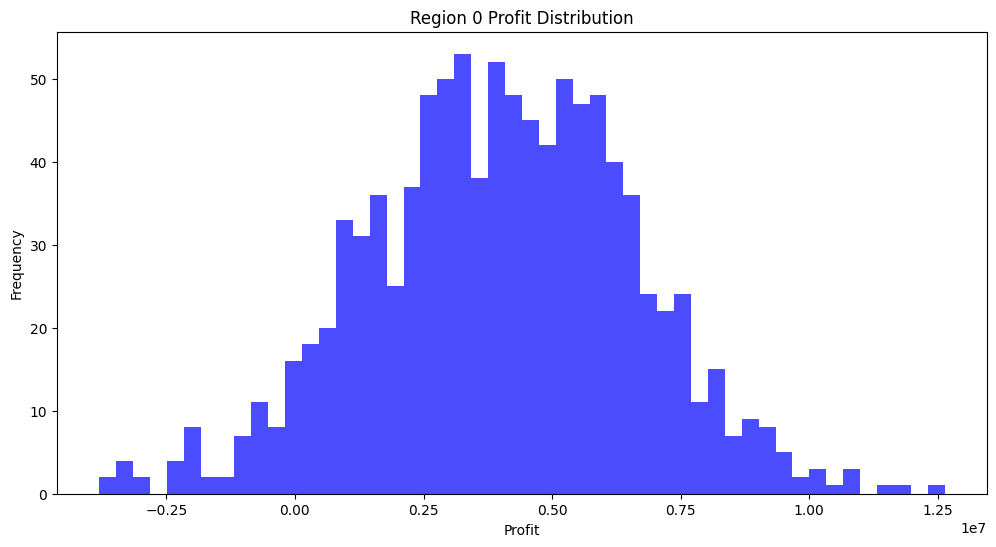

In [34]:
plt.figure(figsize=(12, 6))
plt.hist(profit_samples_region_0, bins=50, color='blue', alpha=0.7)
plt.title('Region 0 Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

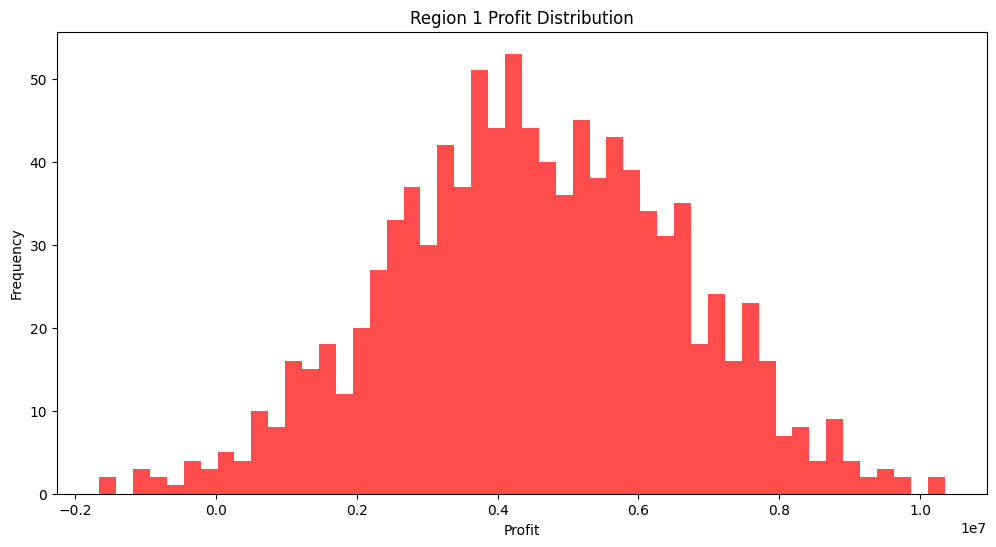

In [37]:
plt.figure(figsize=(12, 6))
plt.hist(profit_samples_region_1, bins=50, color='red', alpha=0.7)
plt.title('Region 1 Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

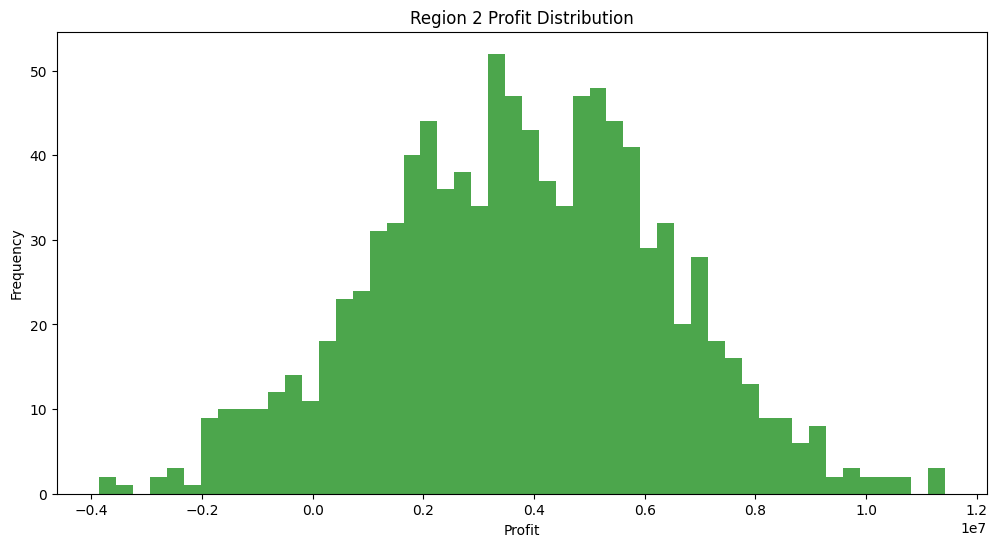

In [38]:
plt.figure(figsize=(12, 6))
plt.hist(profit_samples_region_2, bins=50, color='green', alpha=0.7)
plt.title('Region 2 Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')

From the graphs above we see the distrbutions of profits across the three regions. It is evident that the while region all of them have good profit distrubition, region 0 and 2 have a wider distribution beyond the 0 mark indicating a higher risk of loss. Region 1 has a more uniform structure.

- Region 0: has a skewed distribution with a long right tail. The majority of the profit values are concentrated around 0.25 to 0.5, with a peak around 0.4. There are also some instances of higher profits, extending up to around 1.1. However, the distribution has a sharp drop-off after the peak, indicating fewer occurrences of very high profits in this region. Alot of fluctuations.
- Region 1: The peak is slightly lower than in Region 0, but the distribution is more evenly spread out. There are fewer instances of very low or very high profits in this region compared to Region 0.
- Region 2: This distribution is skewed to the left, with the several peaks. There is a longer tail towards the higher profit values, extending up to around 1.0. Unlike the other regions, there are more instances of lower profits in Region 2, with a significant portion of the distribution below 0.2.

In [56]:
# Print findings for each region
print("Region 0:")
print("Average Profit:", avg_profit_0)
print("95% Confidence Interval:", confidence_interval_0)
print("Risk of Losses:", risk_of_losses_0, "%")

Region 0:
Average Profit: 3995754.7805422964
95% Confidence Interval: [-1104678.95331971  8974603.27717881]
Risk of Losses: 6.0 %


In [57]:
# Print findings for each region
print("Region 1:")
print("Average Profit:", avg_profit_1)
print("95% Confidence Interval:", confidence_interval_1)
print("Risk of Losses:", risk_of_losses_1, "%")

Region 1:
Average Profit: 4520488.909064583
95% Confidence Interval: [ 616844.79654225 8453401.77507385]
Risk of Losses: 1.5 %


In [58]:
# Print findings for each region
print("Region 2:")
print("Average Profit:", avg_profit_2)
print("95% Confidence Interval:", confidence_interval_2)
print("Risk of Losses:", risk_of_losses_2, "%")

Region 2:
Average Profit: 3750099.0291532897
95% Confidence Interval: [-1447667.27304894  8883904.03534222]
Risk of Losses: 8.0 %


## Conclusion

### Graph Analysis:
Region 0:
- Distribution: Multimodal distribution with several peaks.
- Highest Peak: Between 2,500 and 3,000 thousand barrels.
- Interpretation: Indicates multiple clusters of reserves at different volume levels, suggesting a varied distribution of reserve sizes.

Region 1:
- Distribution: Bimodal distribution.
- Highest Peaks: Around 8,000 and 8,500 thousand barrels.
- Interpretation: Most reserves are concentrated around these two volume levels, indicating a distinct split in reserve sizes.

Region 2:
- Distribution: Multimodal distribution with several peaks and troughs.
- Highest Peak: Around 3,000 thousand barrels.
- Interpretation: Indicates a diverse range of reserve sizes, suggesting a complex distribution.

### RMSE Analysis:

Region 0:
- RMSE: 37.76
- Average Volume of Predicted Reserves: 92.40 thousand barrels
- Interpretation: Higher RMSE indicates less accurate predictions, but it has a relatively high average volume of reserves.

Region 1:
RMSE: 0.89
- Average Volume of Predicted Reserves: 68.71 thousand barrels
- Interpretation: Lowest RMSE indicates the highest prediction accuracy. However, it has the lowest average volume of reserves.

Region 2:
- RMSE: 40.15
- Average Volume of Predicted Reserves: 94.77 thousand barrels
- Interpretation: Highest RMSE indicates the least accurate predictions, but it has a high average volume of reserves.

### Bootstrapping Findings:
#### Profit Distribution Analysis
-The profit distributions across the three regions reveal distinct patterns. Region 0 shows a skewed distribution with fluctuations and a higher risk of loss. Region 1 exhibits a more uniform structure, indicating stability. In contrast, Region 2 displays a diverse range of profits with a higher risk of loss. Overall, Region 1 presents the most stable profit distribution, while Regions 0 and 2 show wider distributions and higher risks. These findings provide valuable insights for decision-making in oil well development.

Region 0:
- Average Profit: 3,995,754.78 dollars
- 95% Confidence Interval: [-1,104,678.95, 8,974,603.28]
- Risk of Losses: 6.0 per cent

Region 1:
- Average Profit: 4,520,488.91 dollars
- 95% Confidence Interval: [616,844.80, 8,453,401.78]
- Risk of Losses: 1.5 per cent

Region 2:
- Average Profit: 3,750,099.03 dollars
- 95% Confidence Interval: [-1,447,667.27, 8,883,904.04]
- Risk of Losses: 8.0 per cent

### Summary and Recommendations:
Region 0:
- Region 0 has a high average profit and a wide confidence interval indicating significant variability in potential profits. It also has a moderate risk of losses. Despite the high potential for profit, the increased risk and variability make it less reliable.

Region 1:
- Region 1 shows the highest average profit with a narrower confidence interval, indicating more consistent profitability. It also has the lowest risk of losses, making it a reliable and attractive option despite having a lower volume of reserves.

Region 2:
- Region 2 presents a moderate average profit and a wide confidence interval, suggesting considerable variability in profitability. It also has the highest risk of losses and the least accurate predictions, making it a less favorable option.

### Recommendation:
- Develop oil wells in Region 1 due to its combination of high average profit, low risk of losses, and reliable prediction accuracy. While Region 0 shows high potential profit, the increased risk of losses and greater variability make Region 1 a more balanced and safer choice for maximizing profitability while managing risks effectively.